# EDA (House Pricing, Income, Weather, Services)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
from src.config import (HOUSE_RAW_FILE, HOUSE_CLEAN_FILE,
                        INCOME_RAW_FILE, INCOME_CLEAN_TOTAL, INCOME_CLEAN_EDU,
                        WEATHER_FILE, WEATHER_QUARTER_FILE)

## HOUSE PRICING

The raw csv file needed a lot of attention and contained 3 different groups of data. Among all of the groups we've selected only the columns that were in the quartile average price group. Here's a brief look at the raw file. The data preparation and cleaning was performed in the `00_data_cleaning.ipynb`.

In [3]:
pd.read_csv(HOUSE_RAW_FILE, encoding="latin-1", sep=";")

,ï¿½ndice,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unidade: ï¿½.2,Unnamed: 70
0,COD (NUTS2024),Designaï¿½ï¿½o,1ï¿½ Quartil das vendas por mï¿½ de alojamento...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1ï¿½T2025,4ï¿½T 2024,3ï¿½T2024,2ï¿½T2024,1ï¿½T2024,4ï¿½T 2023,3ï¿½T2023,2ï¿½T2023,...,4ï¿½T 2021,3ï¿½T 2021,2ï¿½T 2021,1ï¿½T 2021,4ï¿½T 2020,3ï¿½T 2020,2ï¿½T 2020,1ï¿½T 2020,4ï¿½T 2019,NaN
2,PT,Portugal,1 066,1 008,972,948,939,938,923,912,...,1 924,1 853,1 801,1 763,1 754,1 724,1 699,1 681,1 639,NaN
3,1,Continente,1 069,1 013,975,951,942,941,926,915,...,1 934,1 864,1 812,1 771,1 763,1 733,1 708,1 692,1 650,NaN
4,11,Norte,1 011,962,921,902,892,889,878,864,...,1 574,1 525,1 488,1 458,1 423,1 382,1 351,1 329,1 289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,3003110,Sï¿½o Vicente,558,615,637,583,533,479,538,587,...,1 299,1 230,1 134,//,1 148,1 259,1 266,1 258,//,NaN
349,"Fonte: INE, I.P., Estatisticas de Preï¿½os da ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The initial csv file contained the entirely empty columns 24, 47 and 70. Those are the separation columns between 3 sections of the table: 
- 1st Quartile of dwellings sales per m² (in the last 12 months)[2-23]
- Median value per m² of dwellings sales (in the last 12 months)[25-46]
- 3rd Quartile of dwellings sales per m² (in the last 12 months)[48-69]

We'll use the 2nd column (Designation) and 26-47 columns (Median value per m² of dwellings sales).

In [4]:
house_df = pd.read_csv(HOUSE_CLEAN_FILE)
house_df.set_index("Designation", inplace=True)

house_df.describe()

,1Q 2025,4Q 2024,3Q 2024,2Q 2024,1Q 2024,4Q 2023,3Q 2023,2Q 2023,1Q 2023,4Q 2022,...,1Q 2022,4Q 2021,3Q 2021,2Q 2021,1Q 2021,4Q 2020,3Q 2020,2Q 2020,1Q 2020,4Q 2019
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1172.496667,1128.611296,1088.747508,1065.658863,1043.516667,1034.184564,1012.843333,993.120000,974.404682,951.376667,...,868.759197,845.530201,830.731959,814.927586,820.858156,810.492908,792.341549,772.784452,750.475694,737.688811
std,751.601200,730.779085,712.656389,699.596201,690.319638,679.254633,665.121737,638.917224,614.864522,592.737970,...,530.145693,509.075051,484.299766,466.065416,449.428683,442.092398,431.795236,426.912887,423.444738,412.531006
min,190.000000,208.000000,220.000000,224.000000,156.000000,156.000000,140.000000,205.000000,143.000000,192.000000,...,177.000000,156.000000,200.000000,189.000000,212.000000,167.000000,167.000000,134.000000,130.000000,156.000000
25%,639.000000,590.000000,573.000000,557.000000,560.000000,545.000000,540.000000,536.000000,537.000000,536.000000,...,494.000000,500.000000,500.000000,497.000000,517.000000,512.000000,500.000000,486.000000,468.000000,464.000000
50%,969.000000,943.000000,923.000000,865.000000,891.000000,887.000000,845.000000,844.000000,831.000000,816.000000,...,740.000000,731.000000,744.000000,721.000000,749.000000,739.000000,722.000000,718.000000,693.000000,672.000000
75%,1496.000000,1419.000000,1341.000000,1321.000000,1342.000000,1279.000000,1293.000000,1235.000000,1213.000000,1187.000000,...,1084.000000,1035.000000,1005.000000,976.000000,952.000000,950.000000,927.000000,907.000000,892.000000,865.000000
max,4412.000000,4340.000000,4252.000000,4203.000000,4188.000000,4167.000000,4151.000000,4080.000000,3965.000000,3872.000000,...,3642.000000,3531.000000,3437.000000,3347.000000,3333.000000,3415.000000,3402.000000,3414.000000,3375.000000,3286.000000


- There is a **consistent increase** in the mean and median values over time, suggesting an **upward trend** in median prices.
- The **standard deviation is relatively high**, indicating substantial variation across regions or categories.
- **Outliers** may be present, as seen in the large gap between the 75th percentile and the maximum value.
- The distribution is likely **right-skewed** (mean > median), with a few very high values pulling the average up.

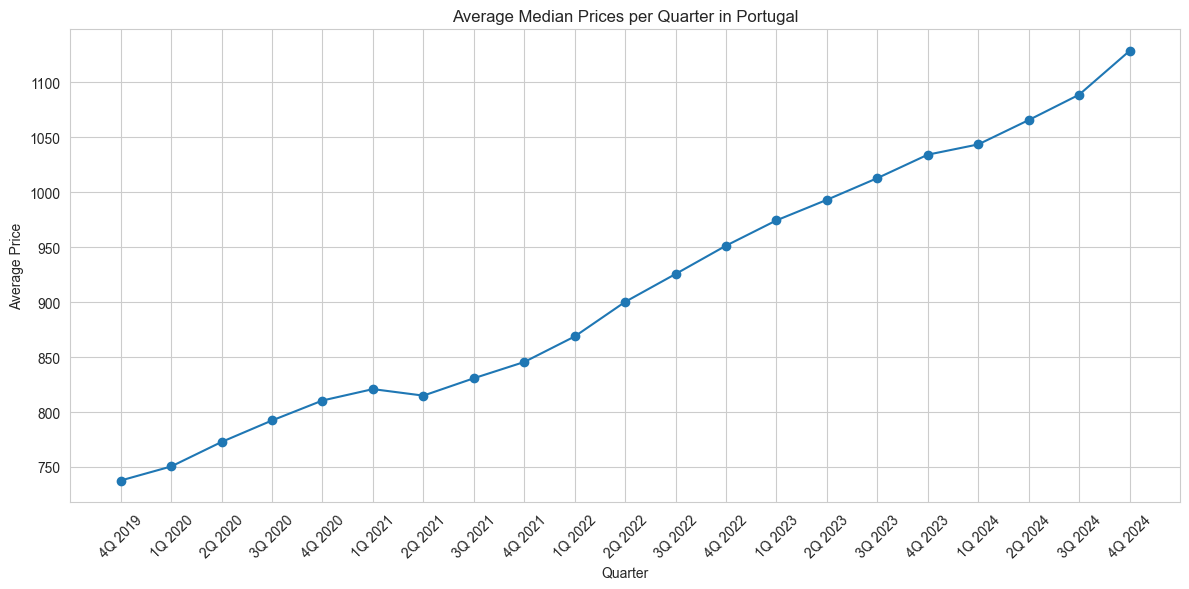

In [10]:
quarter_headers = house_df.columns[1:][::-1].to_list()
quarter_headers.reverse()


plt.figure(figsize=(12, 6))
house_df[quarter_headers].mean().iloc[::-1].plot(kind='line', marker="o")
ticks = range(len(quarter_headers))

plt.title('Average Median Prices per Quarter in Portugal')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.xticks(ticks=ticks, labels=quarter_headers[::-1], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

We clearly see the time trend. It implies the addition of the time feature for the modeling.

In [11]:
house_df.head()

,1Q 2025,4Q 2024,3Q 2024,2Q 2024,1Q 2024,4Q 2023,3Q 2023,2Q 2023,1Q 2023,4Q 2022,...,1Q 2022,4Q 2021,3Q 2021,2Q 2021,1Q 2021,4Q 2020,3Q 2020,2Q 2020,1Q 2020,4Q 2019
Designation,,,,,,,,,,,,,,,,,,,,,
Arcos de Valdevez,960.0,958.0,1000.0,998.0,828.0,813.0,766.0,754.0,760.0,778.0,...,690.0,635.0,680.0,705.0,740.0,794.0,711.0,726.0,693.0,672.0
Caminha,1461.0,1425.0,1415.0,1334.0,1364.0,1318.0,1298.0,1280.0,1201.0,1201.0,...,1158.0,1111.0,1071.0,1000.0,1000.0,978.0,964.0,938.0,946.0,967.0
Melgaço,475.0,400.0,422.0,422.0,388.0,404.0,420.0,400.0,428.0,359.0,...,400.0,362.0,381.0,332.0,337.0,426.0,399.0,515.0,554.0,545.0
Monção,1244.0,1205.0,1244.0,1081.0,918.0,910.0,843.0,895.0,936.0,967.0,...,794.0,755.0,773.0,779.0,810.0,794.0,672.0,655.0,606.0,658.0
Paredes de Coura,770.0,708.0,743.0,722.0,753.0,723.0,600.0,645.0,565.0,587.0,...,654.0,652.0,594.0,531.0,511.0,509.0,479.0,479.0,500.0,513.0


In [12]:
region_avg_prices = house_df.mean(axis=1)
most_expensive_region = region_avg_prices.idxmax()
cheapest_region = region_avg_prices.idxmin()

In [13]:
region_avg_prices.nlargest(5)

Designation
Lisboa     3786.409091
Cascais    3352.681818
Oeiras     2844.227273
Loulé      2803.045455
Lagos      2654.500000
dtype: float64

In [14]:
region_avg_prices.nsmallest(5)

Designation
Figueira de Castelo Rodrigo    183.318182
Penamacor                      261.409091
Mêda                           272.409091
Mação                          276.545455
Almeida                        284.636364
dtype: float64

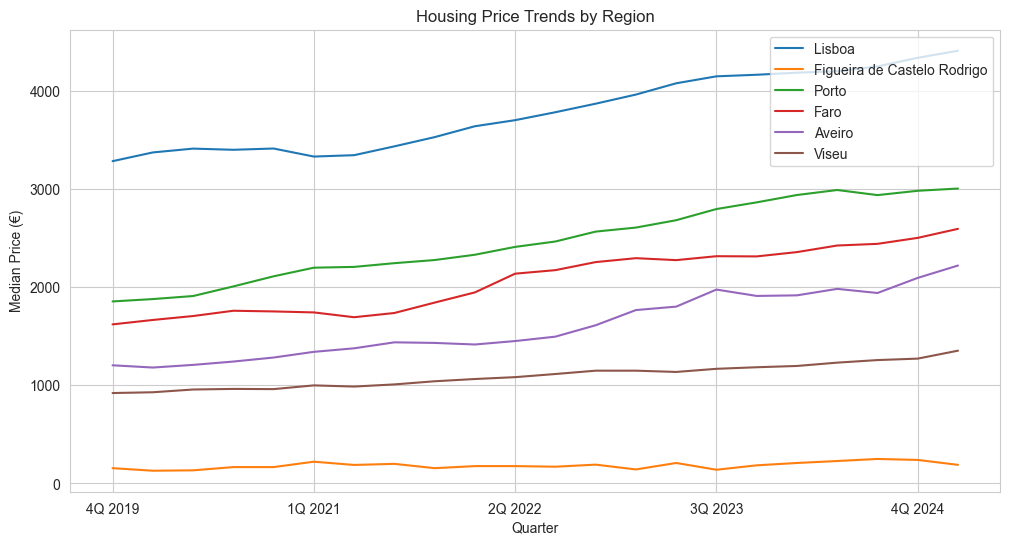

In [15]:
regions_to_plot = [most_expensive_region, cheapest_region, 'Porto', 'Faro', 'Aveiro', 'Viseu']  # or any subset
plt.figure(figsize=(12, 6))

for region in regions_to_plot:
    house_df.loc[region][::-1].plot()

plt.legend()
plt.title("Housing Price Trends by Region")
plt.xlabel("Quarter")
plt.ylabel("Median Price (€)")
plt.grid(True)
plt.show()

In [16]:
house_reset = house_df.reset_index()
df_long = house_reset.melt(
    id_vars=['Designation'],
    var_name='Time_Period',
    value_name='Price'
)
df_long.head()
descriptive_stats = df_long.groupby('Designation')['Price'].describe().round(2)
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
Abrantes,22.0,562.27,77.86,475.0,503.25,538.5,620.75,760.00
Aguiar da Beira,22.0,509.42,224.77,253.0,313.75,414.0,767.21,830.73
Alandroal,22.0,498.91,122.80,281.0,444.00,500.5,535.50,714.00
Albergaria-a-Velha,22.0,935.77,145.02,752.0,811.00,880.0,1072.50,1194.00
Albufeira,22.0,2425.64,365.22,1956.0,2065.25,2397.0,2760.50,3040.00
...,...,...,...,...,...,...,...,...
Vouzela,22.0,510.91,81.94,409.0,445.00,498.5,549.75,707.00
Águeda,22.0,858.23,110.82,709.0,751.75,867.0,969.50,1032.00
Évora,22.0,1567.14,259.93,1194.0,1317.50,1530.0,1852.50,1903.00


## INCOME

Here's a brief look at the raw file. The data preparation and cleaning was performed in the `00_data_cleaning.ipynb`.

In [17]:
income_raw_df = pd.read_csv(INCOME_RAW_FILE, encoding="utf-8")
income_raw_df.head()

,01. Ano,02. Nome Região (Portugal),03. Âmbito Geográfico,04. Filtro 1,05. Filtro 2,06. Filtro 3,08. Símbolo,07. Escala,09. Valor
0,2013.0,Portugal,NaN,01. Inferior ao 1.º ciclo,NaN,NaN,x,euros,NaN
1,2013.0,Portugal,NaN,02. Básico - 1º Ciclo,NaN,NaN,x,euros,NaN
2,2013.0,Portugal,NaN,03. Básico - 2º Ciclo,NaN,NaN,x,euros,NaN
3,2013.0,Portugal,NaN,04. Básico - 3º Ciclo,NaN,NaN,x,euros,NaN
4,2013.0,Portugal,NaN,05. Secundário,NaN,NaN,x,euros,NaN


In [18]:
total_income_df = pd.read_csv(INCOME_CLEAN_TOTAL)
education_income_df = pd.read_csv(INCOME_CLEAN_EDU)

In [19]:
income_avg_df = education_income_df.groupby('region')['value'].mean().reset_index()

print("\n--- Top 10 Consistently Highest-Income Municipalities (Avg. 2019-2023) ---")
top_10_consistent = income_avg_df.sort_values('value', ascending=False).head(10)
print(top_10_consistent)

print("\n--- Bottom 10 Consistently Lowest-Income Municipalities (Avg. 2019-2023) ---")
bottom_10_consistent = income_avg_df.sort_values('value', ascending=True).head(10)
print(bottom_10_consistent)


--- Top 10 Consistently Highest-Income Municipalities (Avg. 2019-2023) ---
            region        value
298  Vila do Porto  2541.045946
70    Castro Verde  2317.856098
243          Sines  2280.204167
7        Alcochete  2065.422727
171         Oeiras  1853.958000
181        Palmela  1766.258000
207    Porto Santo  1727.533333
121         Lisboa  1709.666000
265          Trofa  1660.434000
23         Amadora  1630.580000

--- Bottom 10 Consistently Lowest-Income Municipalities (Avg. 2019-2023) ---
                  region       value
191             Penedono  900.124000
236          Sernancelhe  934.200000
82                 Crato  948.732143
233              Sardoal  952.027586
52   Cabeceiras de Basto  955.117949
299              Vimioso  956.878378
198         Ponta do Sol  957.800000
215              Resende  963.620000
206          Porto Moniz  964.160000
277      Vieira do Minho  971.351282


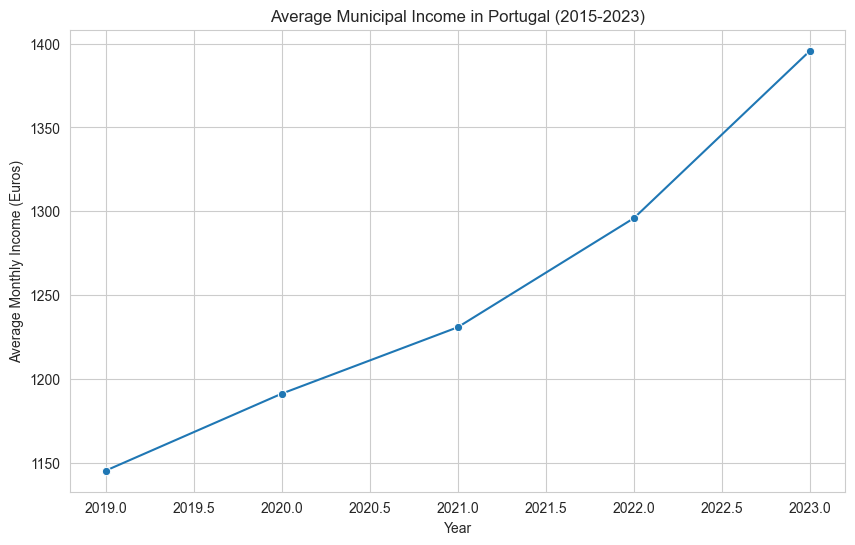

In [20]:
# We group by 'Year' and get the mean of ALL municipalities for that year.
df_avg_by_year = education_income_df.groupby('year')['value'].mean().reset_index()

# Plot 2: Line Chart (Evolution)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_avg_by_year, x='year', y='value', marker='o')

plt.title('Average Municipal Income in Portugal (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.show()

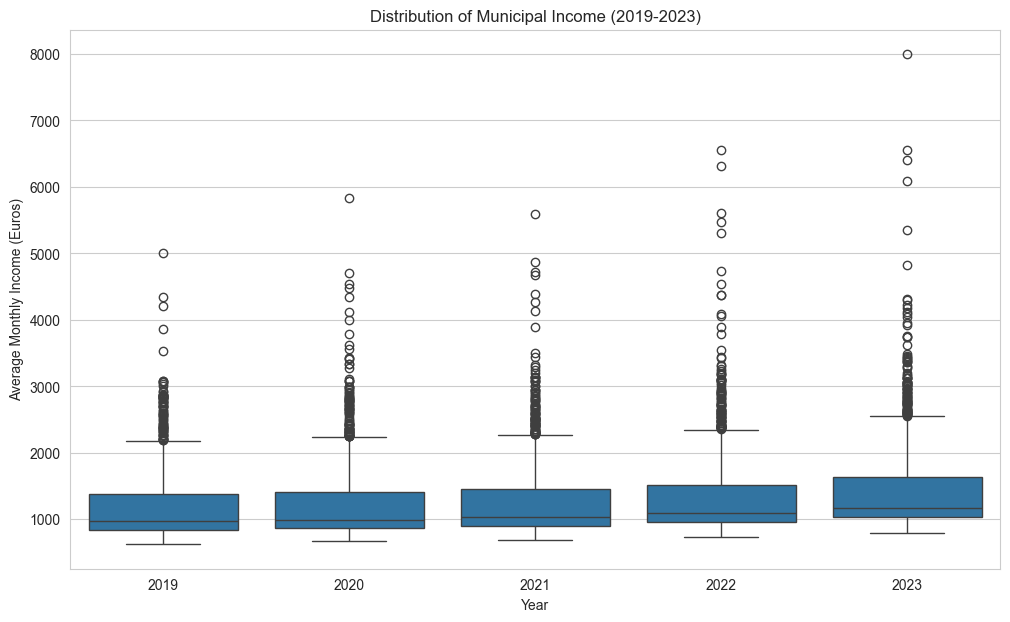

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=education_income_df, x='year', y='value')

plt.title('Distribution of Municipal Income (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.show()

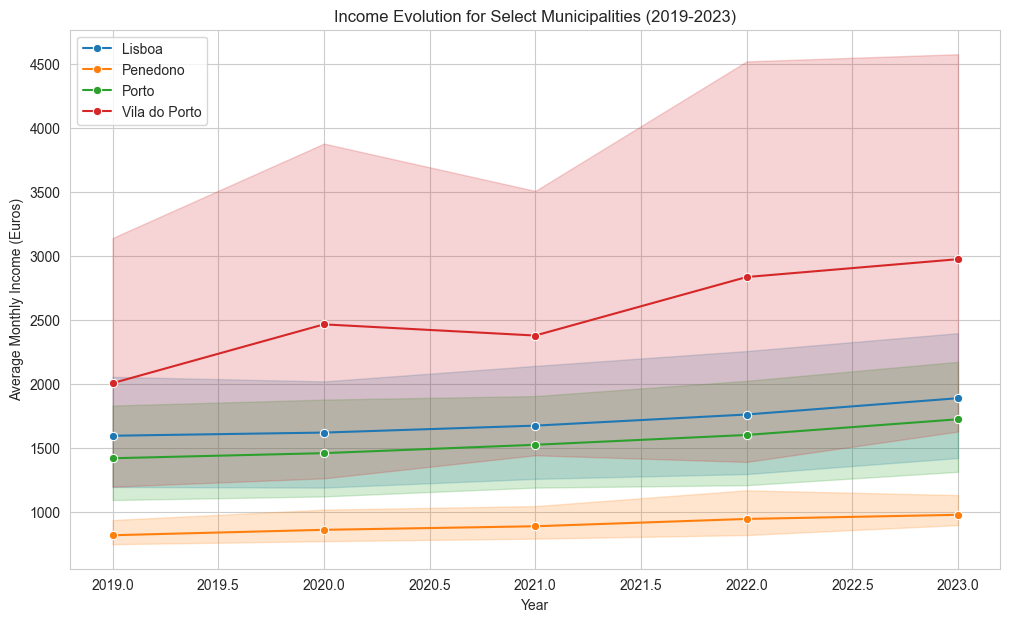

In [22]:
richest_name = top_10_consistent['region'].iloc[0]
poorest_name = bottom_10_consistent['region'].iloc[0]

# We'll plot Lisboa, Porto, and the #1 most/least wealthy from our consistent list
mun_to_compare = ['Lisboa', 'Porto', richest_name, poorest_name]
df_compare = education_income_df[education_income_df['region'].isin(mun_to_compare)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_compare, x='year', y='value', hue='region', marker='o')

plt.title(f"Income Evolution for Select Municipalities (2019-2023)")
plt.xlabel('Year')
plt.ylabel('Average Monthly Income (Euros)')
plt.legend()
plt.show()

## WEATHER

All of the weather data was manually fetched from the [OpenMeteoAPI](https://open-meteo.com/en/docs/historical-weather-api). 
Initially the data was in a daily format and the sunshine duration was in seconds. Those were the first to be adjusted during the prepartion step, that can be fully observed in the `03_weather_features.ipynb`. This part was added after the first modeling attempt, where the weather data had only been grouped quarterly. 

The additions include new engineered features.

In [23]:
weather_daily_df = pd.read_csv(WEATHER_FILE, index_col=0)
weather_daily_df.head()

,region,date,temp_max_c,temp_min_c,sunshine_duration_s,windspeed_mean_kmh,precipitation_sum_mm
0,Arcos de Valdevez,2019-01-01,16.4,6.9,29242.46,4.5,0.0
1,Arcos de Valdevez,2019-01-02,14.6,4.5,29295.18,5.0,0.0
2,Arcos de Valdevez,2019-01-03,13.9,8.5,29352.68,2.8,0.0
3,Arcos de Valdevez,2019-01-04,14.5,7.2,29414.80,3.0,0.0
4,Arcos de Valdevez,2019-01-05,14.8,6.7,29481.41,4.4,0.0


After the first modeling attempt new features were added. They include so-called "comfort level" features that are `windy_days`, `rainy_days`, `sunny_days` and `warm_days`. The idea behind those was to see whether people's tendence to comfort has any impact in our case.

In [24]:
weather_df = pd.read_csv(WEATHER_QUARTER_FILE)
weather_df.head()

,municipality,quarter_year,total_sunshine_h,mean_sunshine_h,windspeed_mean_kmh,total_precipitation_mm,mean_precipitation_mm,windy_days,rainy_days,sunny_days,warm_days
0,Abrantes,1Q 2020,670.993956,7.373560,12.257143,176.0,1.934066,0,38,54,0
1,Abrantes,1Q 2021,642.906106,7.143401,12.695556,282.3,3.136667,0,43,51,0
2,Abrantes,1Q 2022,721.794692,8.019941,13.406667,133.3,1.481111,0,32,63,0
3,Abrantes,1Q 2023,721.709797,8.018998,12.734444,132.8,1.475556,0,35,61,0
4,Abrantes,1Q 2024,639.184814,7.024009,13.785714,454.4,4.993407,0,48,44,1


In [25]:
grouped = weather_df.groupby('municipality').agg({
    'total_sunshine_h': 'sum',
    'windspeed_mean_kmh': 'mean',
    'total_precipitation_mm': 'sum'
})

print('Most Sunny Municipalities:')
grouped['total_sunshine_h'].nlargest(5)

Most Sunny Municipalities:


municipality
Lagoa         40291.182794
Calheta       36327.240794
Santa Cruz    21115.980056
Crato         21011.363428
Santana       20765.184483
Name: total_sunshine_h, dtype: float64

In [26]:
print('\nMost Windy Municipalities:')
grouped['windspeed_mean_kmh'].nlargest(5)


Most Windy Municipalities:


municipality
Vila do Porto             26.112003
Madalena                  24.442324
Velas                     24.091101
Porto Santo               22.207546
Santa Cruz da Graciosa    21.449227
Name: windspeed_mean_kmh, dtype: float64

In [27]:
print('\nMost Rainy Municipalities:')
grouped['total_precipitation_mm'].nlargest(5)


Most Rainy Municipalities:


municipality
Soure                18236.5
Vieira do Minho      14907.2
Arcos de Valdevez    14276.5
Ponte da Barca       13713.5
Portel               13652.1
Name: total_precipitation_mm, dtype: float64

The histograms below show the distribution of Sunshine, Wind Speed, and Precipitation.

- Sunshine: Shows a bimodal distribution, likely reflecting the strong difference between summer and winter quarters.
- Wind Speed: Roughly normal distribution but slightly right-skewed.
- Precipitation: Highly right-skewed, meaning most quarters have low to moderate rain, but "extreme" rain events (high total mm) happen occasionally.

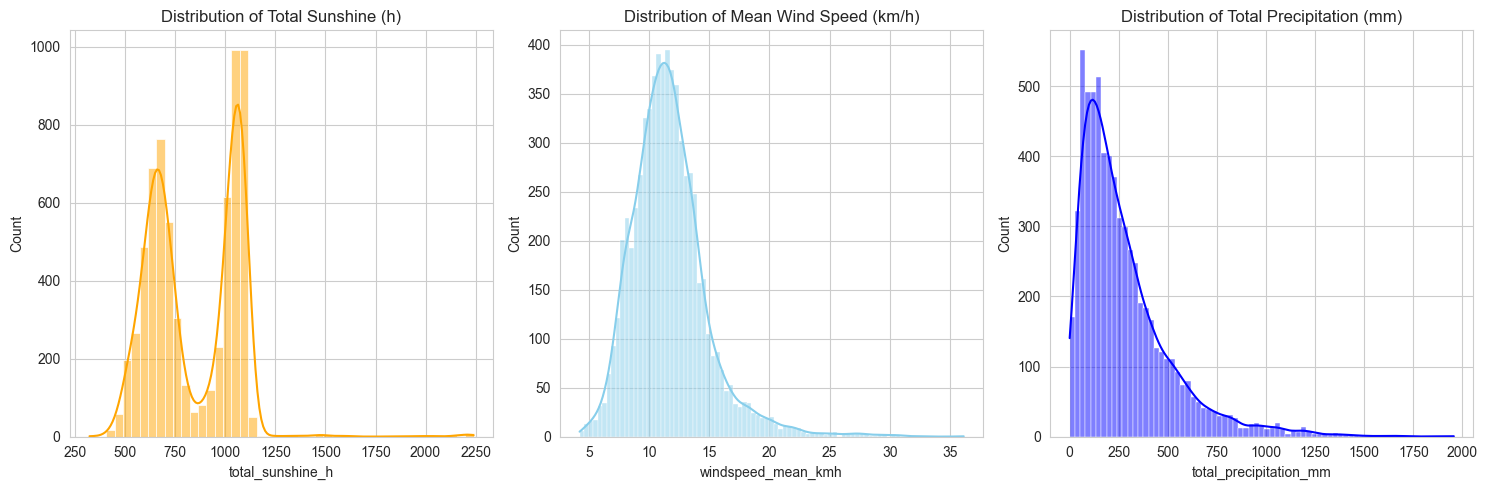

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(weather_df['total_sunshine_h'], kde=True, color='orange')
plt.title('Distribution of Total Sunshine (h)')

plt.subplot(1, 3, 2)
sns.histplot(weather_df['windspeed_mean_kmh'], kde=True, color='skyblue')
plt.title('Distribution of Mean Wind Speed (km/h)')

plt.subplot(1, 3, 3)
sns.histplot(weather_df['total_precipitation_mm'], kde=True, color='blue')
plt.title('Distribution of Total Precipitation (mm)')

plt.tight_layout()
plt.show()